In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rest/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
spreng_db = tardb.FmriTarDataset('data/mini_aging_site1.tar')

In [6]:
dtfa = DTFA.DeepTFA(spreng_db, num_factors=100, embedding_dim=2)

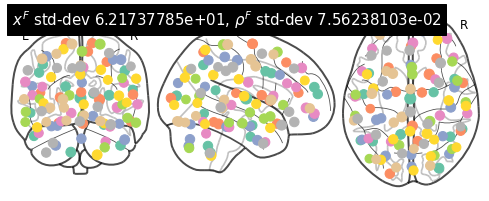

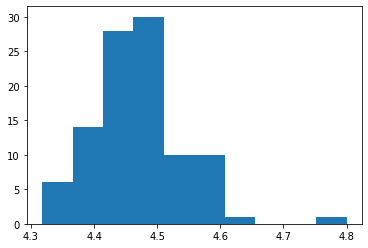

(<nilearn.plotting.displays.OrthoProjector at 0x7fc3581193a0>,
 tensor([[  0.2959, -14.5327,   8.0082],
         [ 30.4819, -87.8441,  10.8278],
         [ 24.8636,  -8.0098, -20.1976],
         [-52.1640, -58.7490,  -7.7520],
         [-15.3230,  57.1722,  19.9614],
         [ 55.2367, -46.7452,  16.7166],
         [ 46.9099,   5.8351,  36.6814],
         [-39.1213, -59.6745,  43.2867],
         [ 13.9697,  60.7649,  12.7119],
         [-48.6624, -10.0031, -32.1243],
         [ -9.8831, -52.3770, -48.9821],
         [-43.1778,  11.9990,  34.6058],
         [ 42.4120, -54.7595, -41.9658],
         [-41.7224, -25.3223,  13.6628],
         [-14.9151,  -7.5537,  65.5075],
         [  8.1895, -59.4595,  56.9049],
         [ 27.8079,  27.5939,  45.9432],
         [  2.5869, -43.4787, -18.7472],
         [ 55.5741,   1.8150,  11.5430],
         [ 20.2635,  10.8328,   6.4017],
         [-21.2392, -93.6930,   8.5147],
         [  1.0447,  40.4520,  14.1329],
         [ 53.3073, -48.6207, -16.7

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

14

In [9]:
dtfa.num_voxels

142880

In [10]:
dtfa.load_state('sub-CHECK_09072023_221049_Epoch2000')

/home/zulqarnain/Code/ntfa_rest/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


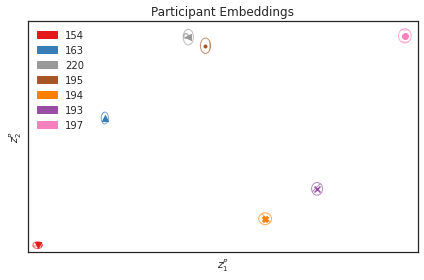

In [11]:
dtfa.scatter_subject_weight_embedding(figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding.pdf')